In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
dataset=pd.read_csv('ch150.tsp', sep=' ')

In [4]:
dataset.info

<bound method DataFrame.info of        1  37.4393516691  541.2090699418
0      2     612.175951      494.316688
1      3      38.131234      353.148458
2      4      53.441808      131.484901
3      5     143.060636      631.720095
4      6     689.945127      468.535500
..   ...            ...             ...
145  147     334.274876      152.149457
146  148     690.965859      134.579331
147  149      48.079812      270.968067
148  150      91.646765      166.354116
149  EOF            NaN             NaN

[150 rows x 3 columns]>

In [5]:
dataframe=dataset.iloc[:149,1:3]

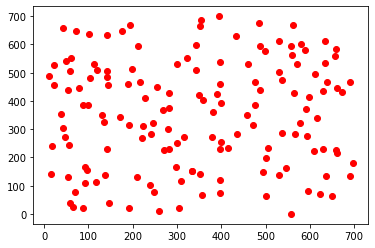

In [6]:
plt.scatter(dataset.iloc[:149,1:2], dataset.iloc[:149,2:3],color='red')

In [7]:
scale=StandardScaler()

In [54]:
df=scale.fit_transform(dataframe)
df=pd.DataFrame(df,columns=["X", "Y"])

In [55]:
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km=km.fit_predict(X)
y_km

array([0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2])

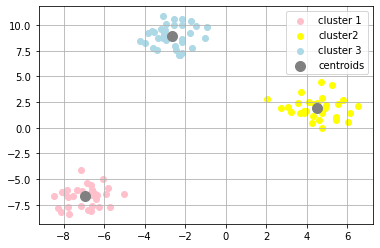

In [59]:
y_km
plt.scatter(X[y_km==0,0],X[y_km==0,1],color='pink',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],color='yellow',label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],color='lightblue',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100 ,marker='o',c='gray',label='centroids')
plt.legend()
plt.grid()
plt.show()

C:\Users\turac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


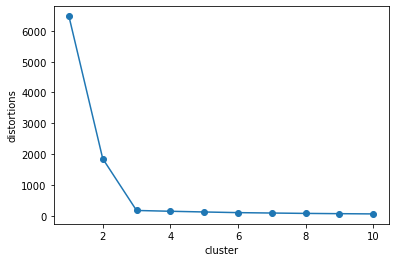

In [60]:
distortions=[]
for i in range (1,11):
    km= KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300,random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('cluster')
plt.ylabel('distortions')
plt.show()